<a href="https://colab.research.google.com/github/AniruddhSrivatsa/AniruddhSrivatsa/blob/master/Titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#viewing all the columns in the dataset
pd.set_option("display.max_rows", None, "display.max_columns", None)
df=pd.read_csv("titanic_train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#viewing the background info of the dataset
print(df.dtypes)
print(df.info())
print(df.describe())
print(df.shape)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2

In [ ]:
#Total fare of the trip
print(df["Fare"].sum())

28693.9493


In [ ]:
df1=df.drop(["Ticket","Cabin"],axis=1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
#converting male and female to 1 and 0 respectively
df1["Sex"]=df["Sex"].map({"male":1,"female":0}).astype("int")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


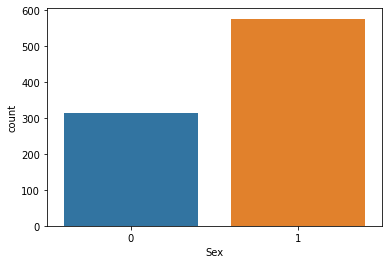

In [ ]:
#we will start the data analysis now
sns.countplot("Sex",data=df1)



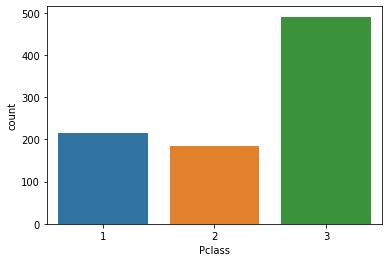

In [ ]:
sns.countplot("Pclass",data=df1)

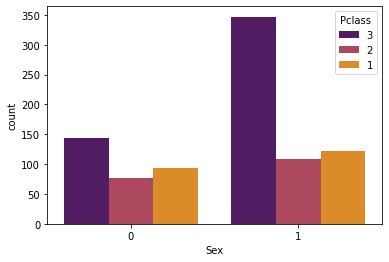

In [ ]:
#now we will try combine both the graphs
sns.countplot("Sex",hue="Pclass",palette="inferno",hue_order=[3,2,1],data=df1)

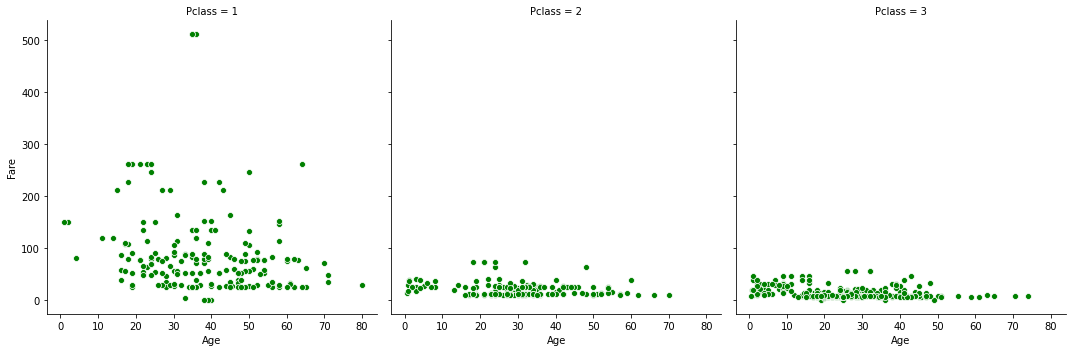

In [ ]:
sns.relplot(x="Age",y="Fare",col="Pclass",kind="scatter",data=df1,color="g")

looks complicated....  so we can split them in terms of gender too

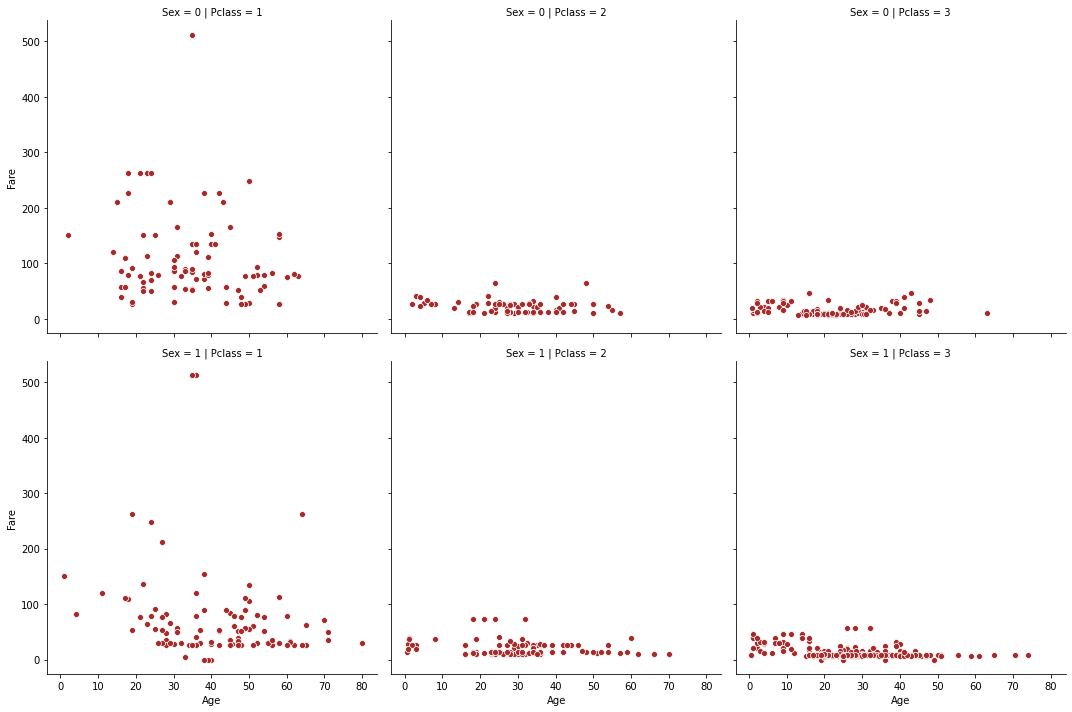

In [ ]:
sns.relplot(x="Age",y="Fare",col="Pclass",row="Sex",kind="scatter",data=df1,color="brown")

we can see that that the class 2 and 3 have similar distribution of fares for the age groups but the fare for class 1  varies from 0-300.
This may be due to additional services requested by the passengers.

In [ ]:
df1["age_group"]=pd.cut(df1["Age"],bins=[0,18,30,50,70,120],labels=[1,2,3,4,5],include_lowest=False)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,3


In [ ]:
df_sibdead=df1.loc[(df1["SibSp"]>=1) &(df1["Survived"]==1)]
print(df_sibdead.shape[0]/df.shape[0]*100,"% survival chance if you have one or more sibling spouse pairs")

14.814814814814813 % survival chance if you have one or more sibling spouse pairs


If you don't have siblings or spouses, you have higher probablity to survive 

In [ ]:
df_parch=df1.loc[(df1["Parch"]>=1) & (df1["Survived"]==1)]
print(df_parch.shape[0]/df.shape[0]*100,"% survival chance if you have one or more parent children pairs")

12.2334455667789 % survival chance if you have one or more parent children pairs


In [ ]:
df_pardead=df1.loc[((df1["Parch"]>=1) & (df1["SibSp"]>=1)) &(df1["Survived"]==1)]
print(df_pardead.shape[0]/df.shape[0]*100,"% survival chance if you have one or more parent children pairs and one or more sibling spouse pairs")

6.958473625140292 % survival chance if you have one or more parent children pairs and one or more sibling spouse pairs


In [ ]:
df_alone=df1.loc[((df1["Parch"]==0) & (df1["SibSp"]==0)) &(df1["Survived"]==1)]
print(df_alone.shape[0]/df.shape[0]*100,"% survival chance if you are alone")

18.29405162738496 % survival chance if you are alone


In [ ]:
df1["age_group"].value_counts()

2    270
3    241
1    139
4     59
5      5
Name: age_group, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


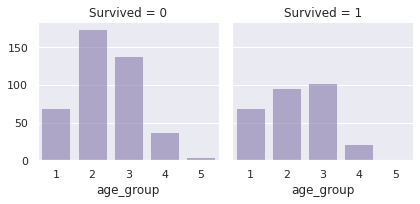

In [ ]:

g=sns.FacetGrid(data=df1,col="Survived")
g.map(sns.countplot,"age_group",color="m",alpha=0.6)

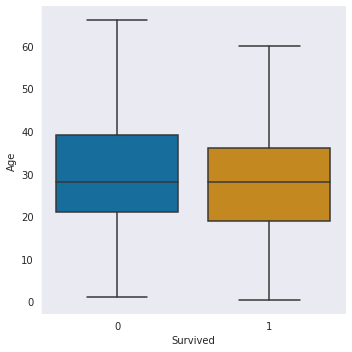

In [ ]:
sns.set_style("dark")
sns.catplot(x="Survived",y="Age",kind="box",data=df1,sym="",palette="colorblind")

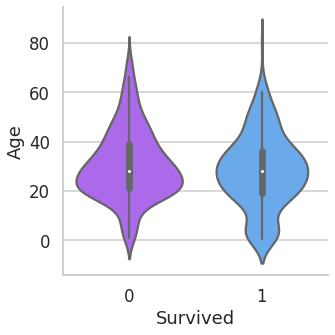

In [ ]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.catplot(x="Survived",y="Age",kind="violin",data=df1,sym="",palette="cool_r")

we observe that the median of the passengers dead and alive are almost 28 from bar and violin plot

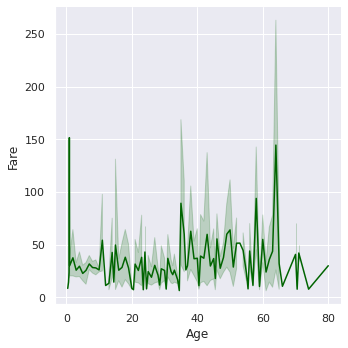

In [ ]:
#for default seaborn settings
sns.set()
sns.relplot("Age","Fare",data=df1,color="darkgreen",kind="line")

In [ ]:
alone=df1.loc[(df1["Parch"]==0) & (df1["SibSp"]==0)]
alone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,3
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,8.4583,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,S,4
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,26.5500,S,4


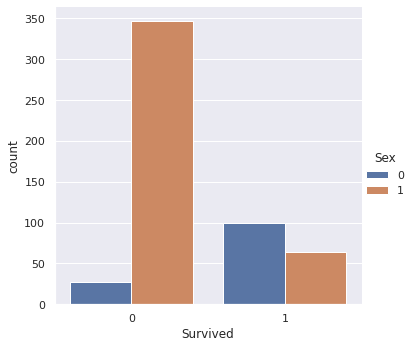

In [ ]:
sns.catplot(x="Survived",kind="count",data=alone,hue="Sex")

we can see that the probability of women being alone is less and the survival probability of "alone" women in high."alone" men have low suvival probability. 


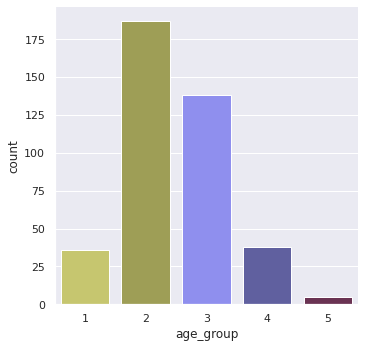

In [ ]:
sns.catplot(x="age_group",kind="count",data=alone,palette="gist_stern_r")

age group 2: 18-30 belong mostly to the "alone" members

In [ ]:
age_group=[1,2,3,4,5]
groups=[]
for i in age_group:
 group=alone.loc[alone["age_group"]==i].shape[0]/df1.shape[0]
 groups.append(group*100)
 print(group*100,"% of total members belong to alone and",i,"age group")

4.040404040404041 % of total members belong to alone and 1 age group
20.98765432098765 % of total members belong to alone and 2 age group
15.488215488215488 % of total members belong to alone and 3 age group
4.264870931537598 % of total members belong to alone and 4 age group
0.5611672278338945 % of total members belong to alone and 5 age group


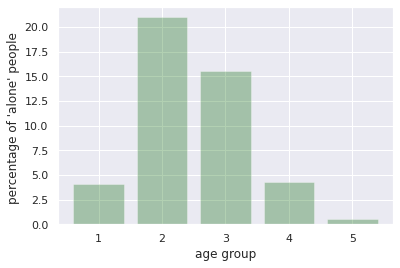

In [ ]:
fig,ax=plt.subplots()
ax.bar(age_group,groups,color="darkgreen",alpha=0.3)
ax.set_xlabel("age group")
ax.set_ylabel("percentage of 'alone' people ")
plt.show()

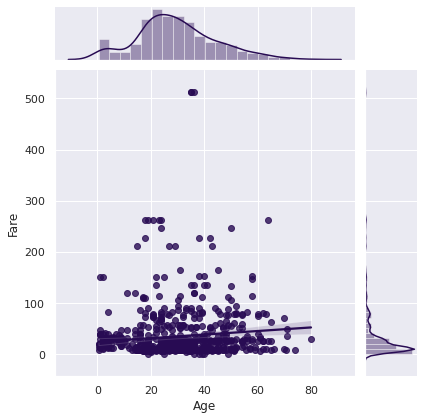

In [ ]:
g=sns.JointGrid(data=df1,x="Age",y="Fare")
g.plot(sns.regplot,sns.distplot)



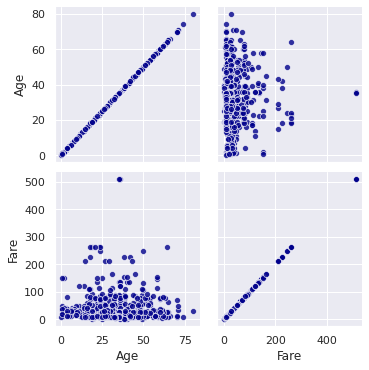

In [ ]:
g=sns.PairGrid(data=df1,vars=["Age","Fare"])
g.map(sns.scatterplot,color="darkblue",alpha=0.8)


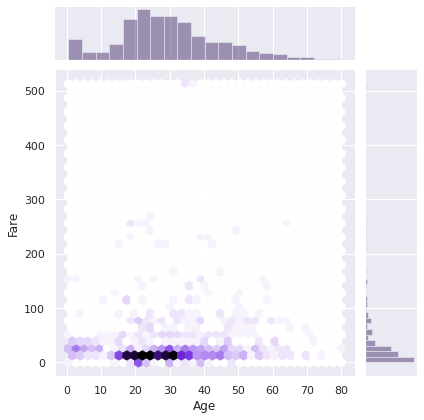

In [ ]:
sns.jointplot(x="Age",y="Fare",data=df1,kind="hex")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


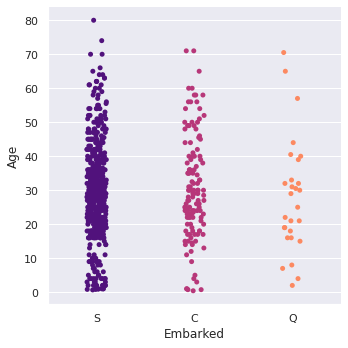

In [ ]:
sns.factorplot(x="Embarked",y="Age",kind="strip",data=df1,jitter=True,palette="magma")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


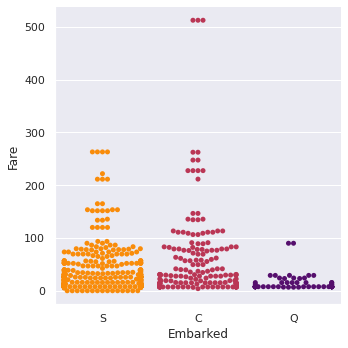

In [ ]:
sns.factorplot(x="Embarked",y="Fare",kind="swarm",data=df1,palette="inferno_r")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2613: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


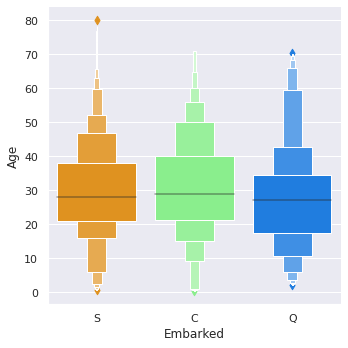

In [ ]:
sns.factorplot(x="Embarked",y="Age",kind="lv",data=df1,palette="jet_r")

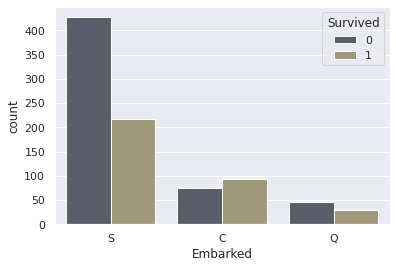

In [ ]:
sns.countplot(x="Embarked",hue="Survived",data=df1,palette="cividis")

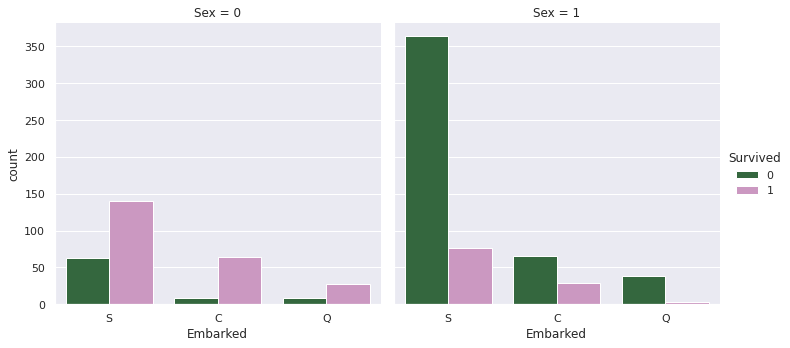

In [ ]:
sns.catplot(x="Embarked",hue="Survived",data=df1,palette="cubehelix",col="Sex",kind="count")